In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# IMPORTING DATASETS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
dataset=pd.read_csv("Downloads\\heart.csv",delimiter=",")
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


ANALYSING DATASET THROUGH HISTOGRAM

<ipython-input-5-9cef04e2a24c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8D701B8B0>,
      dtype=object)

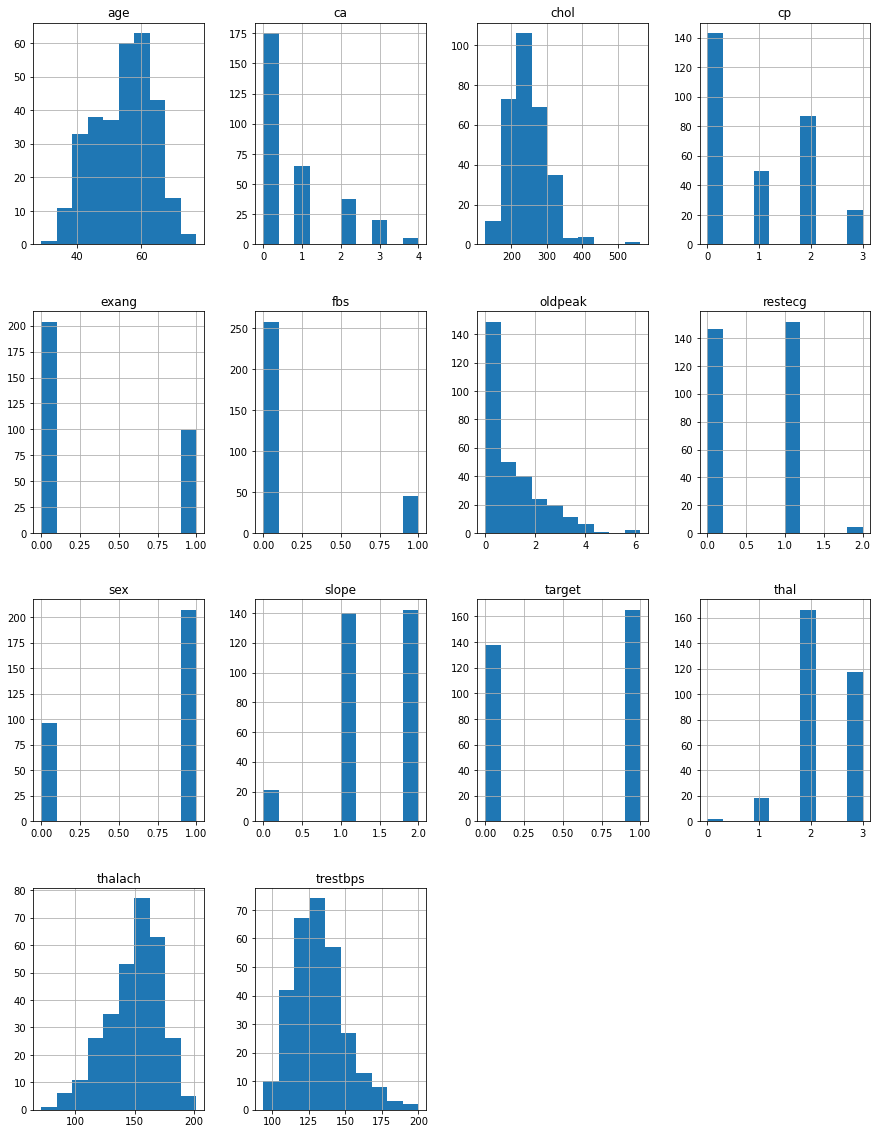

In [5]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax=ax)

In [6]:
y = dataset["target"]

In [7]:
import seaborn as sns

# VISUALISING DATA WITH TARGET VARIABLE

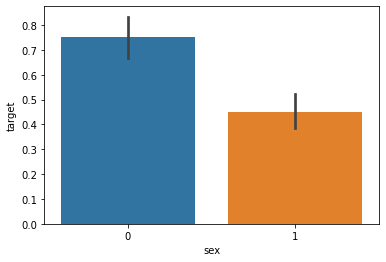

In [8]:
sns.barplot(dataset["sex"],y)

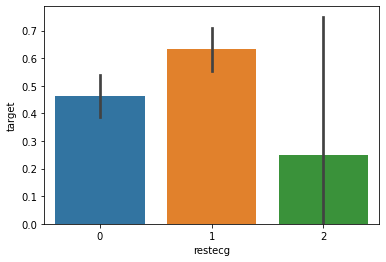

In [9]:
sns.barplot(dataset["restecg"],y)

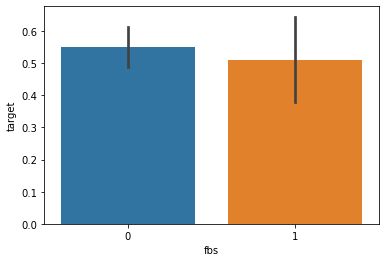

In [10]:
sns.barplot(dataset["fbs"],y)

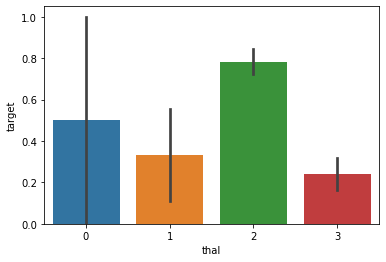

In [11]:
sns.barplot(dataset["thal"],y)

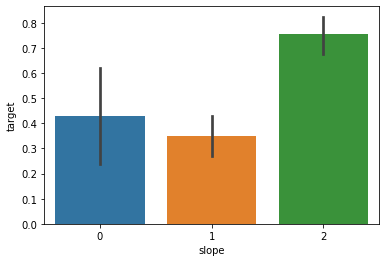

In [12]:
sns.barplot(dataset["slope"],y)

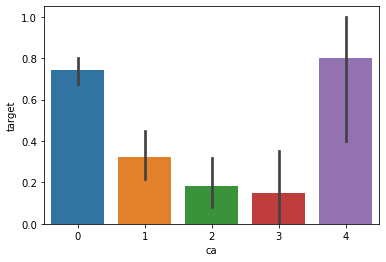

In [13]:
sns.barplot(dataset["ca"],y)

In [14]:
predictors = dataset.drop("target",axis=1)
predictors

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data_scaled=scaler.fit_transform(predictors)

In [16]:
#data_scaled

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,y,test_size=0.20,random_state=0)

# VARIOUS ALGORITHM IMPLEMENTATION

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [20]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

85.25

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [22]:

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred_knn = knn.predict(X_test)
    knn_scores.append(round(accuracy_score(Y_pred_knn,Y_test)*100, 2))


In [24]:
knn_scores

[52.46, 59.02, 63.93, 63.93, 63.93, 65.57, 67.21, 68.85, 67.21, 65.57]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

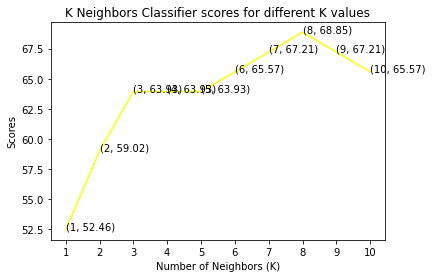

In [25]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'yellow')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

from above we can say that accuracy of knn at n_neighbours=8 is the highest from all so we will take n=8 as the best to calculate accuracy.

In [26]:
score_knn=knn_scores[7]
score_knn

68.85

In [27]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb

C:\Users\91730\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [28]:

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

78.69

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
dt= DecisionTreeClassifier(random_state = 0,max_features=10)
dt.fit(X_train, Y_train)
Y_pred_dt=dt.predict(X_test)
Y_pred_dt

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [31]:

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
score_dt

80.33

In [33]:
max_accuracy=0
for i in range(1000):
    rd=RandomForestClassifier(random_state=i)
    rd.fit(X_train,Y_train)
    Y_pred_rd=rd.predict(X_test)
    observed_accuracy = round(accuracy_score(Y_pred_rd,Y_test)*100,2)
    if(observed_accuracy>max_accuracy):
        max_accuracy = observed_accuracy
        best_x = i
        
print(max_accuracy)
print(best_x)

rd= RandomForestClassifier(random_state=best_x)
rd.fit(X_train,Y_train)
Y_pred_rd = rd.predict(X_test)

90.16
323


In [34]:
score_rd=round(accuracy_score(Y_pred_rd,Y_test)*100,2)
score_rd

90.16

In [35]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [36]:
score_svm=round(accuracy_score(Y_pred_svm,Y_test)*100,2)
score_svm

81.97

In [37]:
score=[score_lr,score_nb,score_knn,score_svm,score_xgb,score_dt,score_rd]
score

[85.25, 85.25, 68.85, 81.97, 78.69, 80.33, 90.16]

# ACCURACY SCORE OF DIFFERENT ALGORITHMS

In [38]:
algorithms = ["Logistic Regression","Naive Bayes","KNeighbours","SVM","XGBoost","Decision Tree","Random Forest"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(score[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using KNeighbours is: 68.85 %
The accuracy score achieved using SVM is: 81.97 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Decision Tree is: 80.33 %
The accuracy score achieved using Random Forest is: 90.16 %


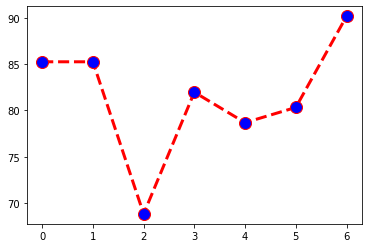

In [39]:
plt.plot(score ,color='red', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)

As we can clearly see from all the models RANDOM FOREST is the best as its accuracy score is higher than all.